### 1.Import numpy and pandas and load data file named 'test_Y3wMUE5_7gLdaTN.csv' as test



In [29]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

In [30]:
test=pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### 2.Print list of column names


In [31]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

### 3.Types of data columns


In [32]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

### 4.Summary statistics


In [33]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


### DATA CLEANING AND PREPROCESSING

### 5.Find missing values

In [34]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### 6.Impute missing values with mean (numerical variables)


In [35]:
x=test['LoanAmount']
y=test['Loan_Amount_Term']

In [36]:
test['LoanAmount'].fillna(x.mean(),inplace=True)


In [37]:
test['Loan_Amount_Term'].fillna(y.mean(),inplace=True)

In [38]:
test['Credit_History'].fillna(1,inplace=True)

In [39]:
gender=test['Gender']
depend=test['Dependents']
s_em=test['Self_Employed']

In [40]:
test['Gender'].fillna(gender.mode()[0],inplace=True)


In [41]:
test['Dependents'].fillna(depend.mode()[0],inplace=True)

In [42]:
test['Self_Employed'].fillna(s_em.mode()[0],inplace=True)

In [43]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### 8.Remove irrelevant columns Loan_ID variable - Irrelevant from test and train data



In [44]:
test.drop('Loan_ID',axis=1,inplace=True)

In [45]:
test['Dependents'].replace('3+',3, inplace=True)

### 9.Build dummy variables for categorical variables



In [46]:
gender= pd.get_dummies(test['Gender'])
married=pd.get_dummies(test['Married'])
education=pd.get_dummies(test['Education'])
selfemployed=pd.get_dummies(test['Self_Employed'])

In [47]:
 test.drop(['Gender','Married','Education','Self_Employed'],axis=1,inplace=True)

In [48]:
test1= pd.concat([test,gender,married,education,selfemployed],axis=1)
test1

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male,No,Yes,Graduate,Not Graduate,No,Yes
0,0,5720,0,110.0,360.0,1.0,Urban,0,1,0,1,1,0,1,0
1,1,3076,1500,126.0,360.0,1.0,Urban,0,1,0,1,1,0,1,0
2,2,5000,1800,208.0,360.0,1.0,Urban,0,1,0,1,1,0,1,0
3,2,2340,2546,100.0,360.0,1.0,Urban,0,1,0,1,1,0,1,0
4,0,3276,0,78.0,360.0,1.0,Urban,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,3,4009,1777,113.0,360.0,1.0,Urban,0,1,0,1,0,1,0,1
363,0,4158,709,115.0,360.0,1.0,Urban,0,1,0,1,1,0,1,0
364,0,3250,1993,126.0,360.0,1.0,Semiurban,0,1,1,0,1,0,1,0
365,0,5000,2393,158.0,360.0,1.0,Rural,0,1,0,1,1,0,1,0


### 10.Get x as columns of ApplicantIncome and Credit_History


In [60]:
X=test1.iloc[:,[1,5]].values


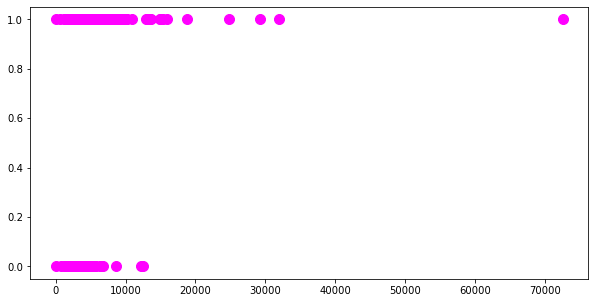

In [59]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1],s=100,c='magenta')

### 11.Import matplotlib


In [51]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

### 12.Elbow method to determine K


In [61]:
css = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    css.append(kmeans.inertia_)
css

[8826028227.63488,
 3923519734.5736914,
 1836441822.0535605,
 876634962.3406311,
 505265914.5898069,
 270702426.9029824,
 192373912.24830267,
 151203602.4114949,
 124491111.76301023,
 104261587.24291703]

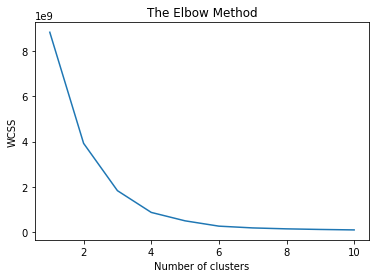

In [62]:
plt.plot(range(1, 11), css)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### 13.fit K_means with founded K



In [65]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 3, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,

### 14.show cluster results


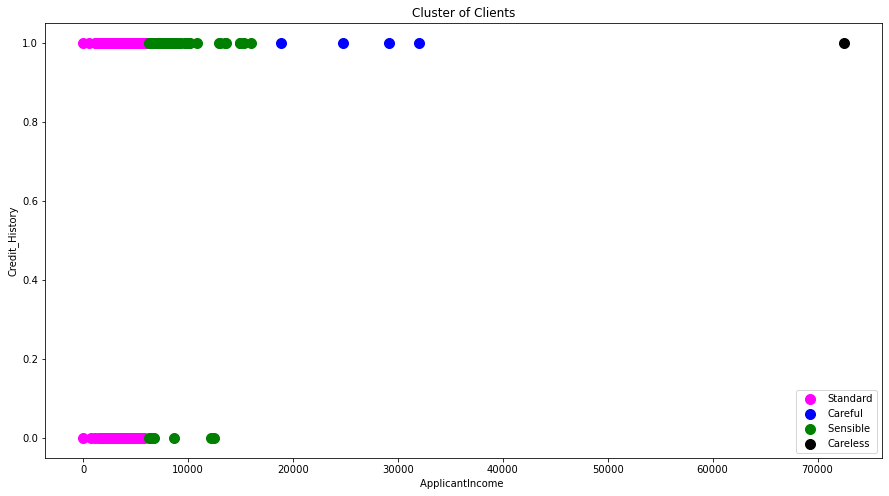

In [68]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Standard')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Careful')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Sensible ')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='black',label='Careless')
plt.title('Cluster of Clients')
plt.xlabel('ApplicantIncome ')
plt.ylabel('Credit_History')
plt.legend()
plt.show()

### 15.print cluster centers


In [69]:
kmeans.cluster_centers_

array([[3.50281579e+03, 8.25657895e-01],
       [2.62010000e+04, 1.00000000e+00],
       [8.99079310e+03, 8.96551724e-01],
       [7.25290000e+04, 1.00000000e+00]])

### 17.Create dendogram



In [70]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

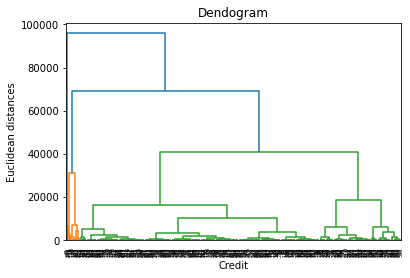

In [72]:
dendogram=sch.dendrogram(sch.linkage(X,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('Credit')
plt.ylabel('Euclidean distances')
plt.show()

### 18.Fit agglomerative hierarchical clustering



In [73]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

### 19.Lets plot those clusters!



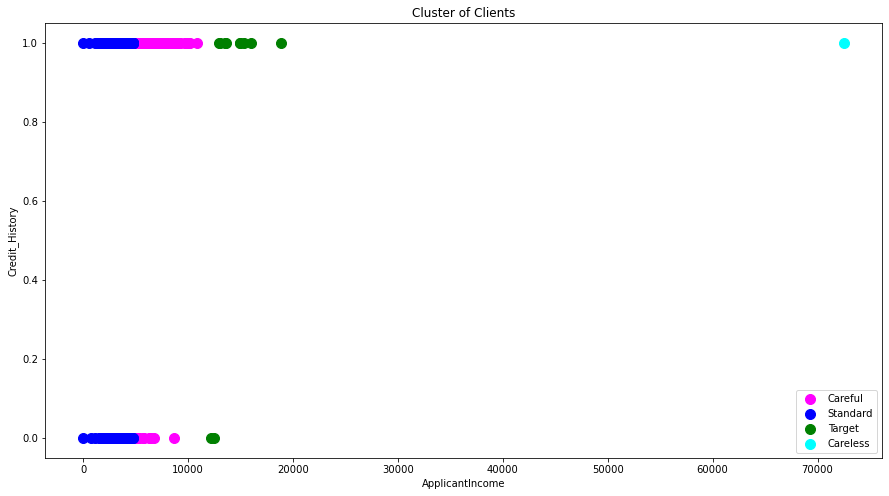

In [76]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='magenta',label='Careful')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='Careless')
plt.title('Cluster of Clients')
plt.xlabel('ApplicantIncome')
plt.ylabel('Credit_History')
plt.legend()
plt.ioff()
plt.show()